<a href="https://colab.research.google.com/github/AayeshaF/Telco_Churn_Prediction/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from collections import Counter
from sklearn.metrics import roc_curve, roc_auc_score




In [151]:
#load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [152]:
#data exploration
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [153]:
print("Dataset Shape: ",df.shape)

Dataset Shape:  (7043, 21)


In [154]:
print("First 5 rows:\n ",df.head())

First 5 rows:
     customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies     

In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [156]:
df.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [157]:
#check for missing values
missing_values =df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [158]:
#convert total charges to numeric
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors = "coerce")

In [159]:
#check again for missing values
missing_values =df.isnull().sum()
print(missing_values)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [160]:
#dropping records
df=df.dropna(subset=["TotalCharges"])

In [161]:
#checking again for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [162]:
#to make sure there are no any more empty strings
df.applymap(lambda x: isinstance(x,str) and x.strip() == "").sum()

/tmp/ipython-input-3902298065.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: isinstance(x,str) and x.strip() == "").sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [163]:
#check for incorrect labels/structural errors
for col in df.columns:
  print(col, df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

In [164]:
#checking for duplicates
print("Number of duplicate records: ",df.duplicated().sum())

Number of duplicate records:  0


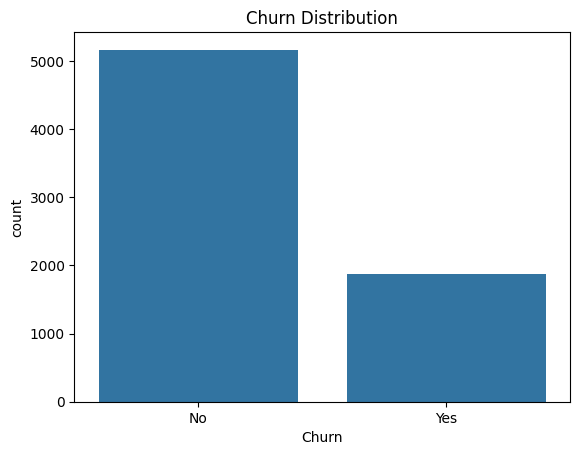

In [165]:
#churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()


In [166]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


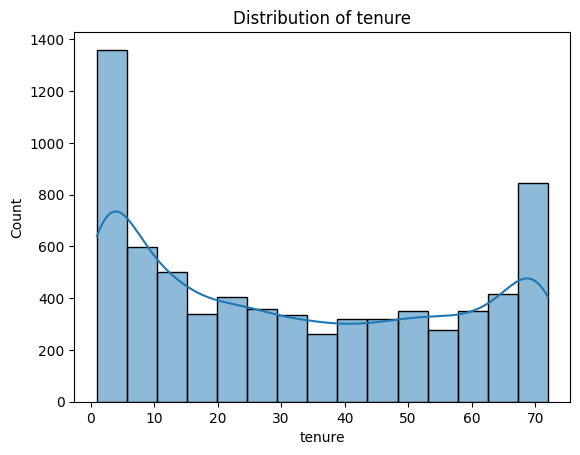

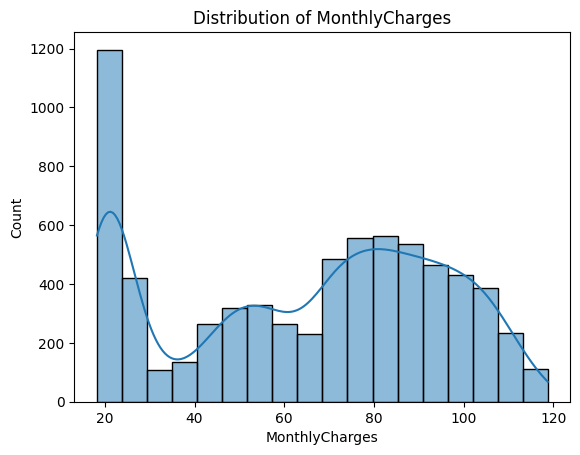

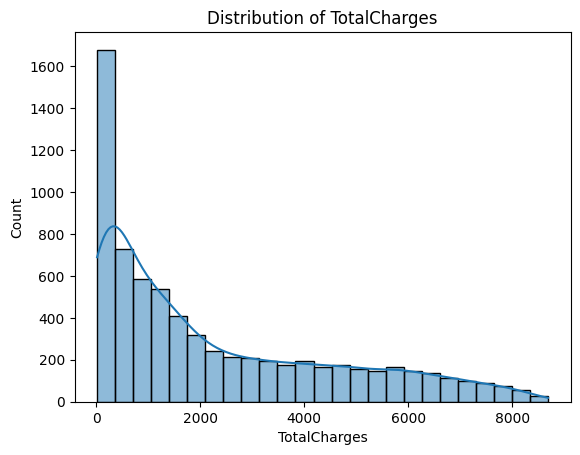

In [167]:
#univariate analysis for numerical columns
num_cols= ['tenure','MonthlyCharges','TotalCharges']
for col in num_cols:
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

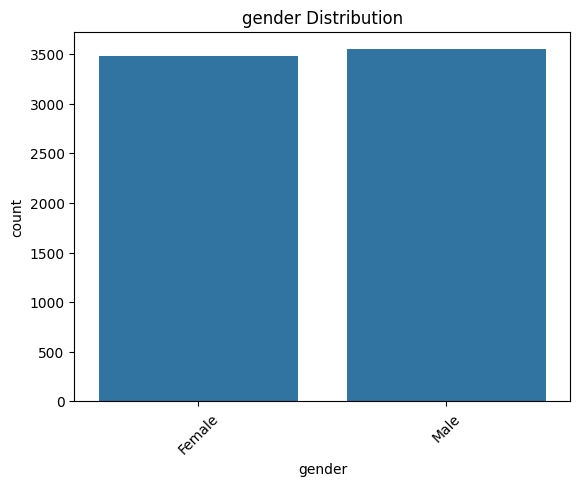

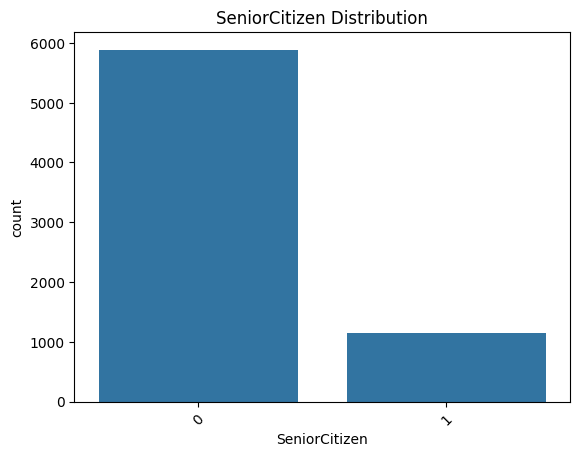

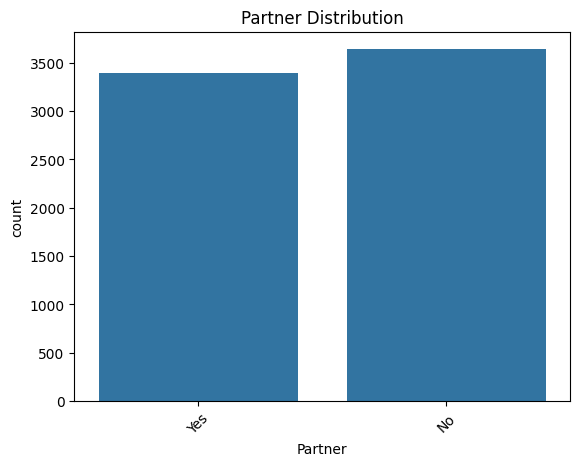

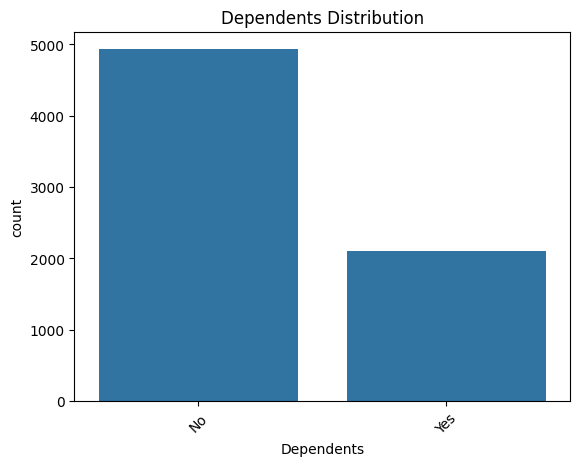

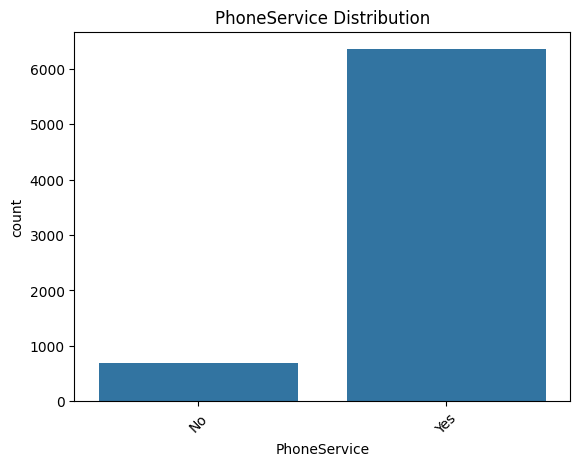

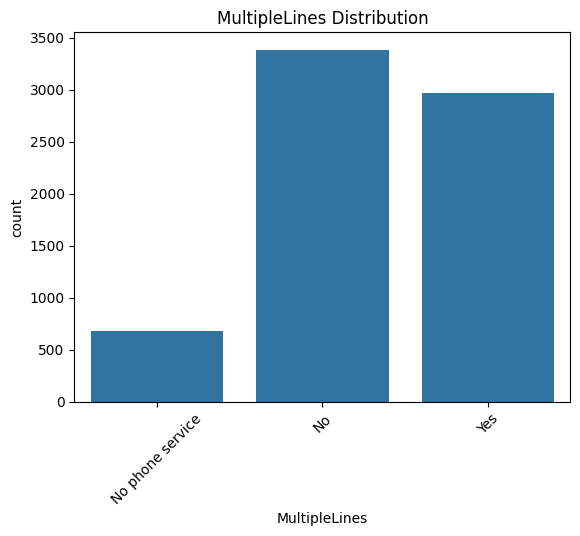

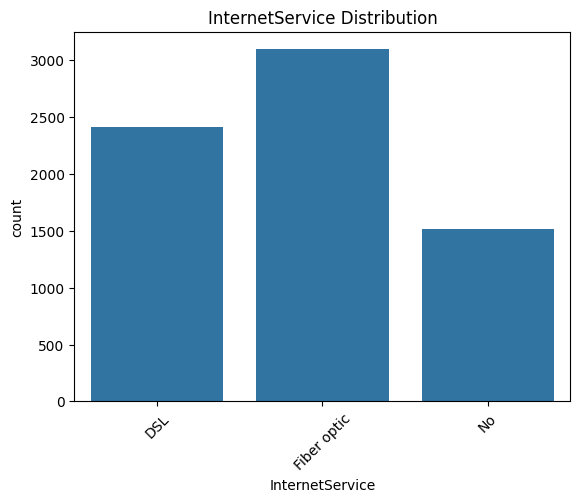

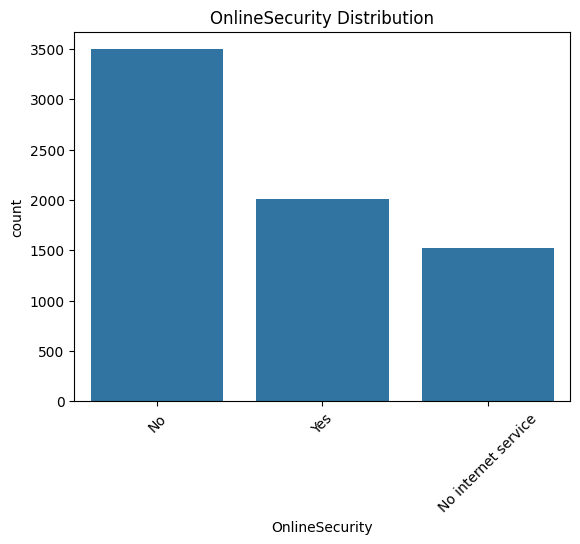

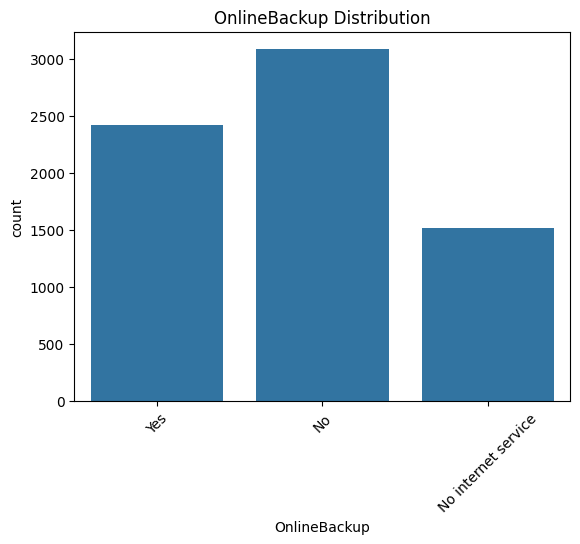

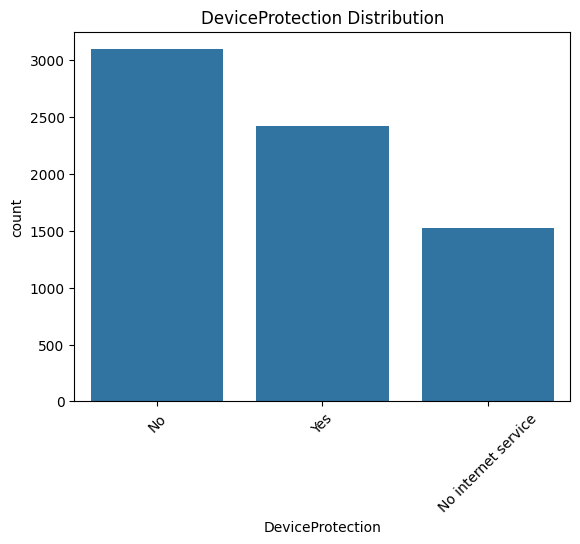

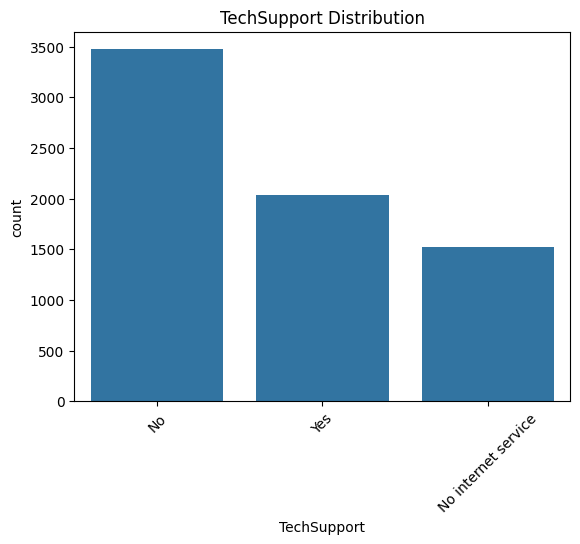

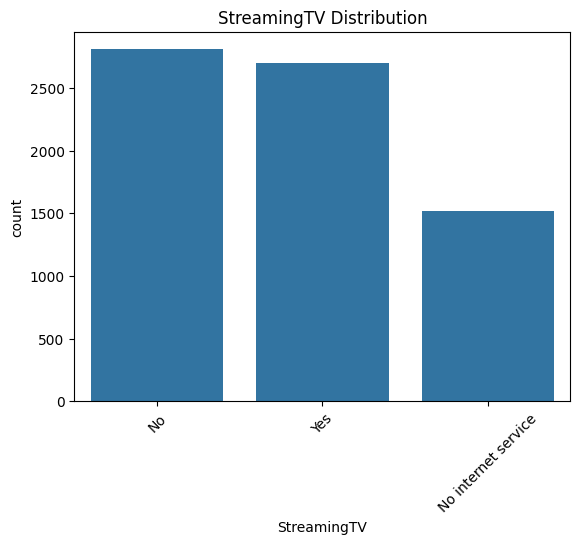

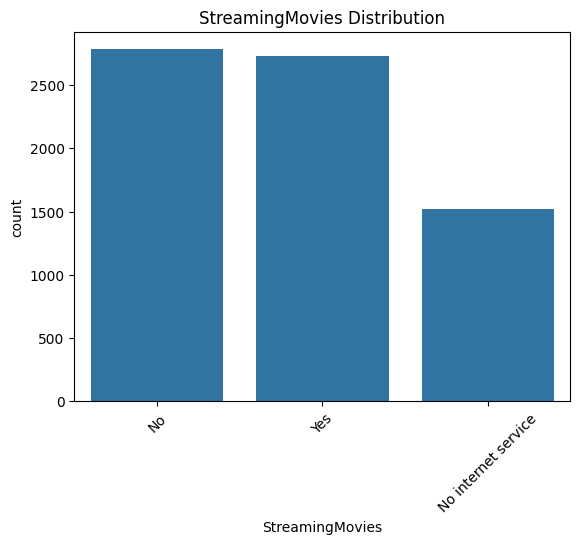

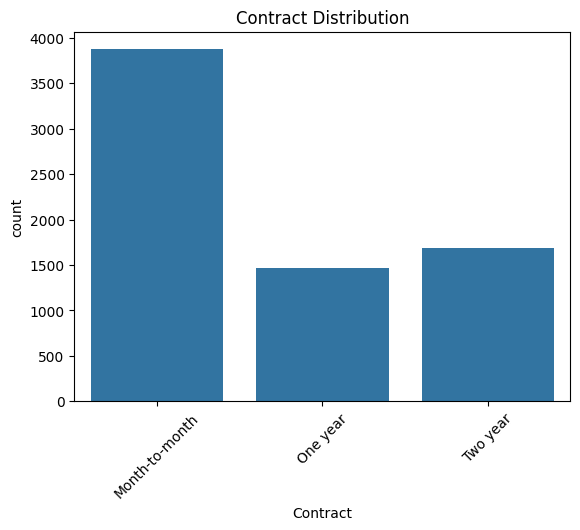

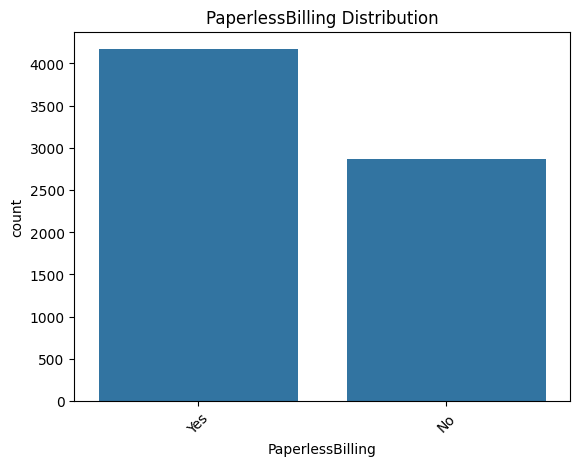

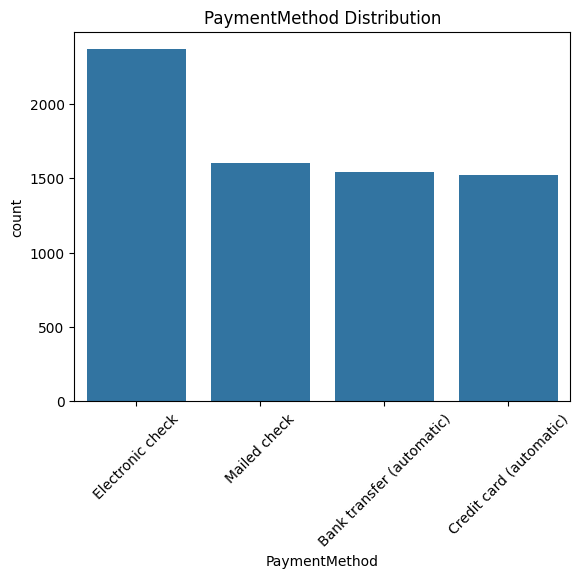

In [168]:
#univariate analysis for categorical columns
cat_cols= ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for col in cat_cols:
  sns.countplot(data=df, x=col)
  plt.xticks(rotation=45)
  plt.title(f"{col} Distribution")
  plt.show()

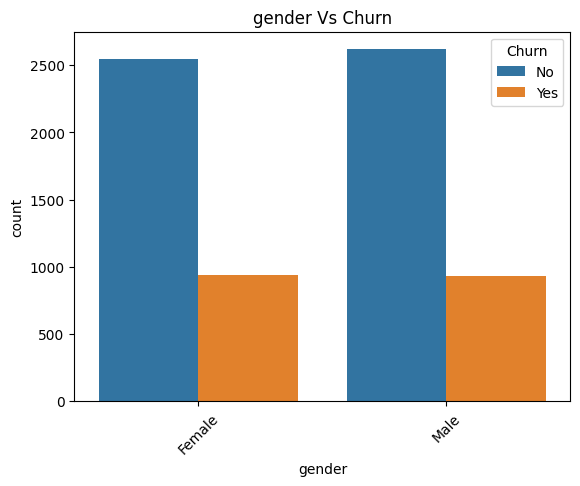

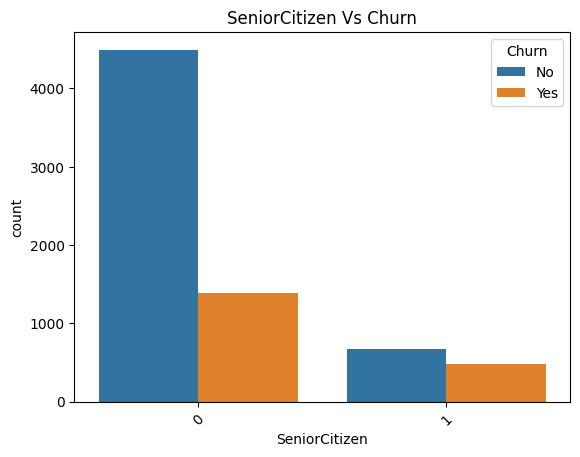

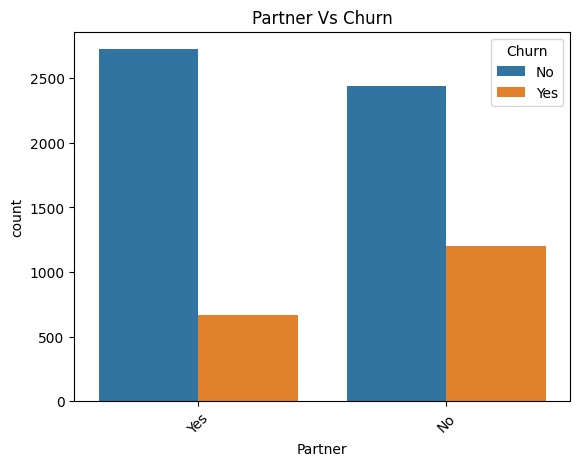

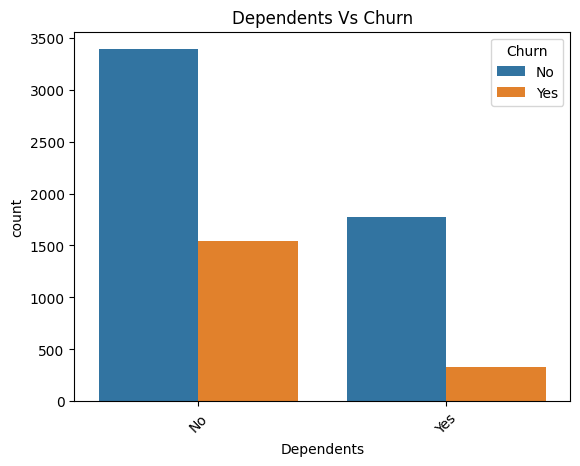

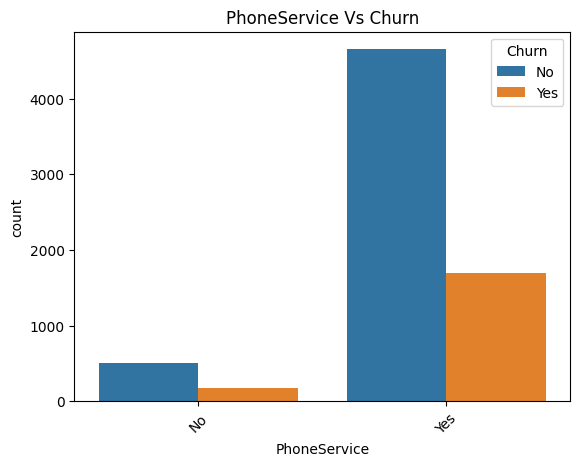

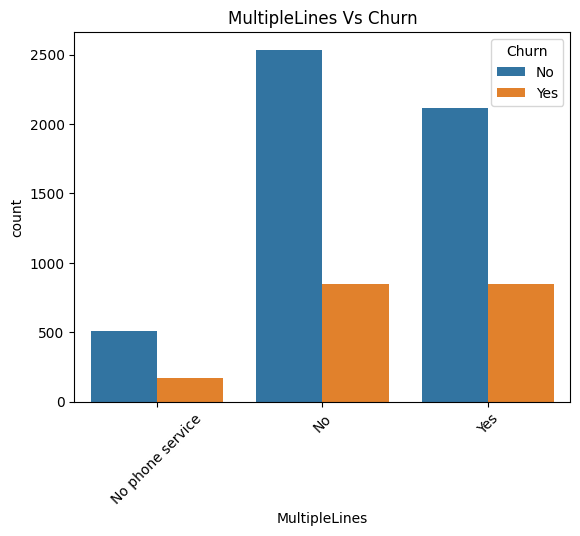

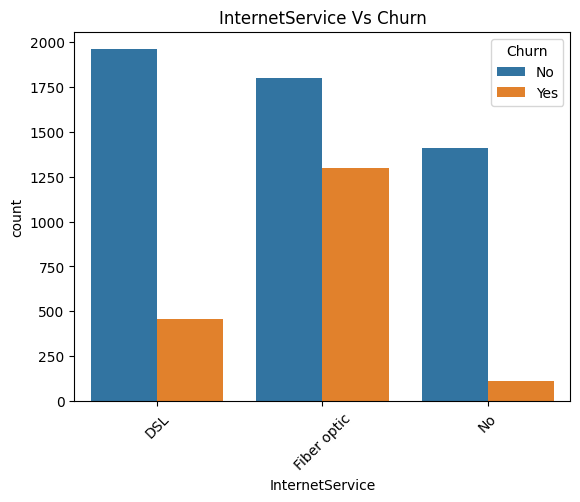

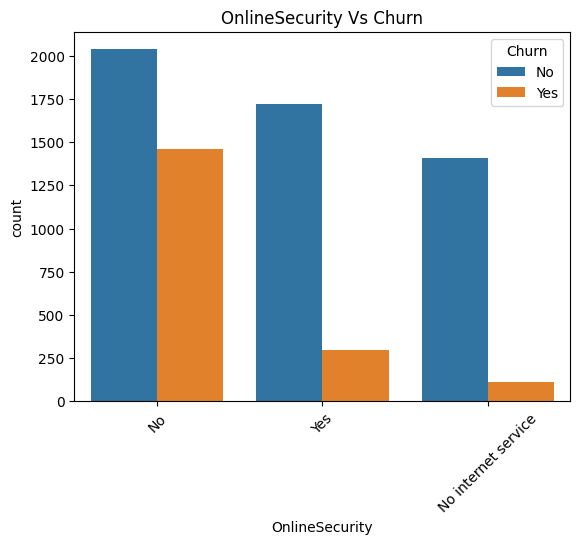

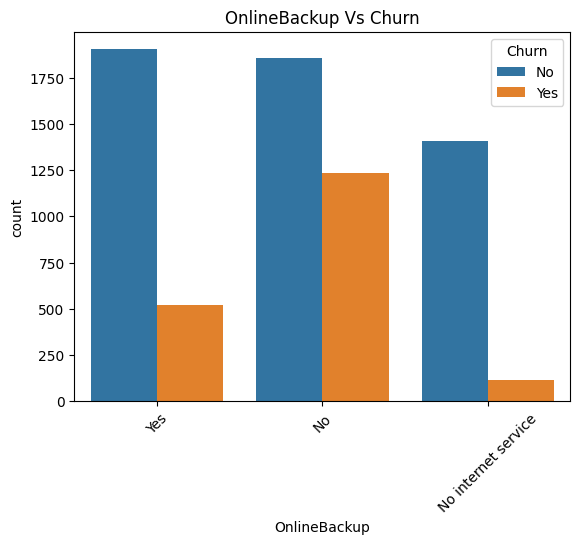

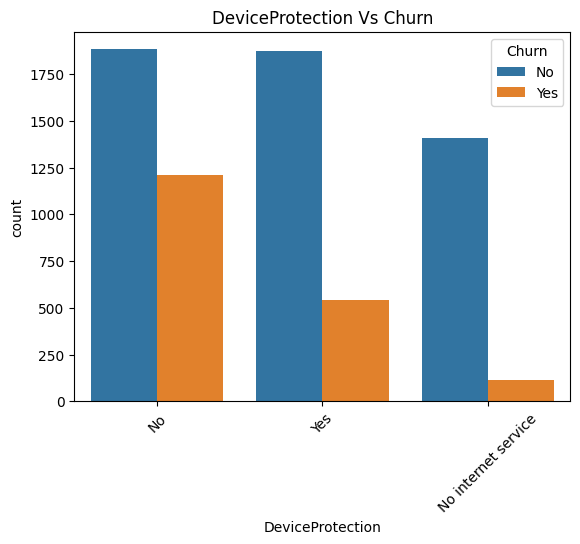

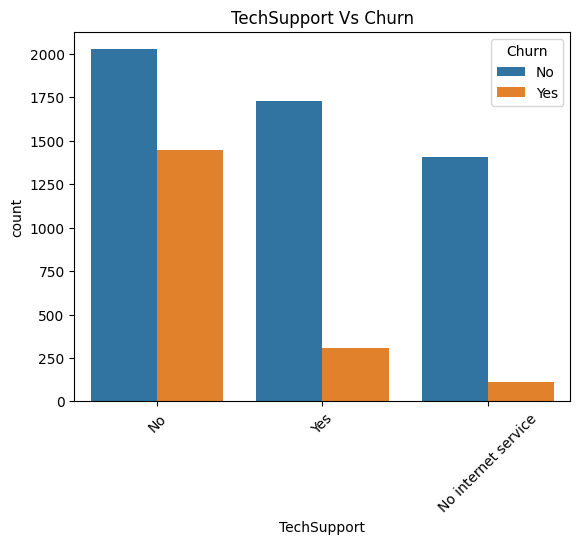

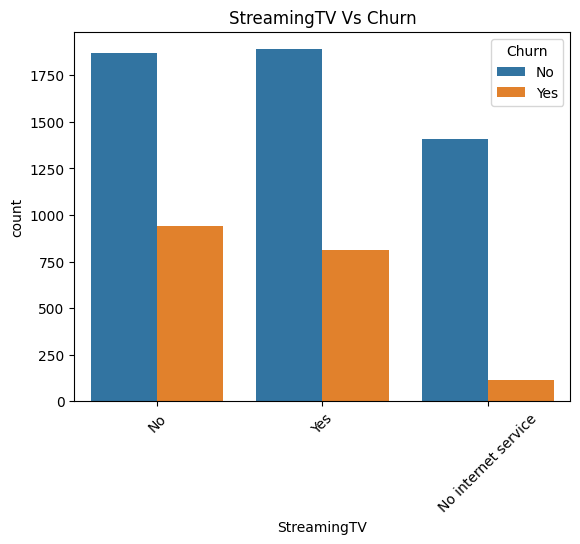

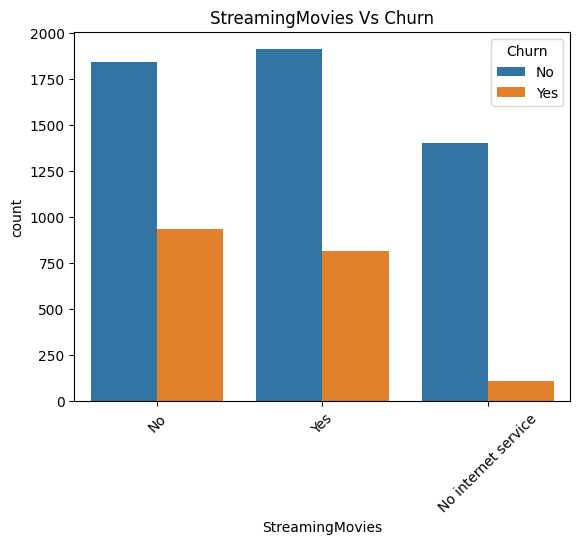

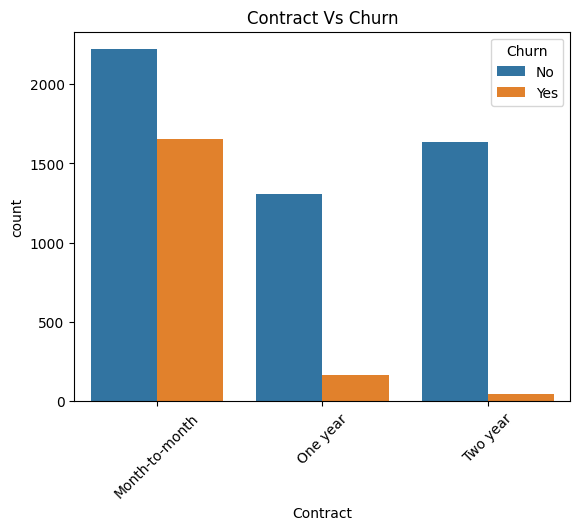

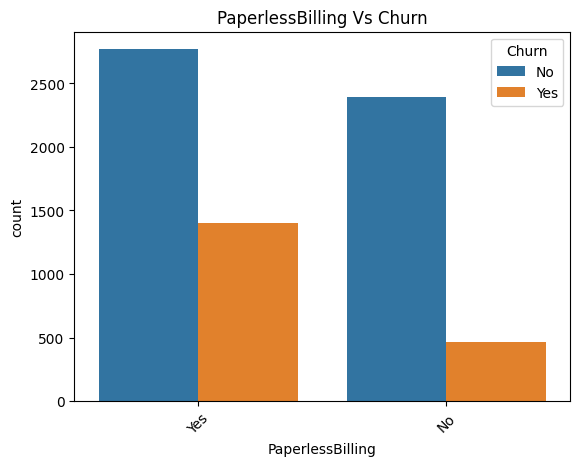

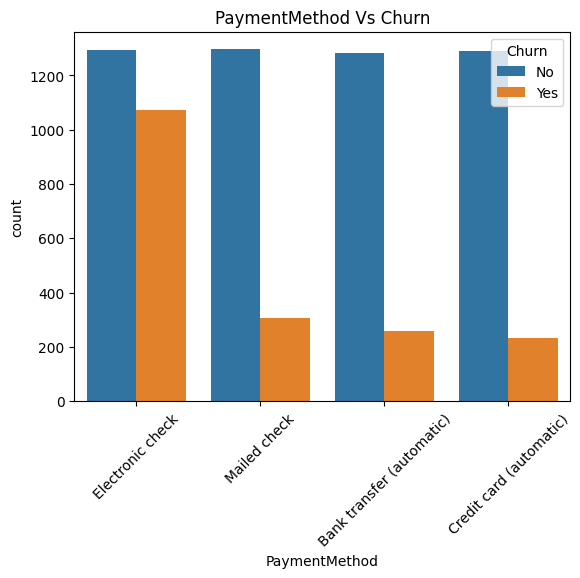

In [169]:
#Bivariate analysis, Churn Vs Categorical features
for col in cat_cols:
  sns.countplot(data=df, x=col, hue='Churn')
  plt.xticks(rotation=45)
  plt.title(f"{col} Vs Churn")
  plt.show()

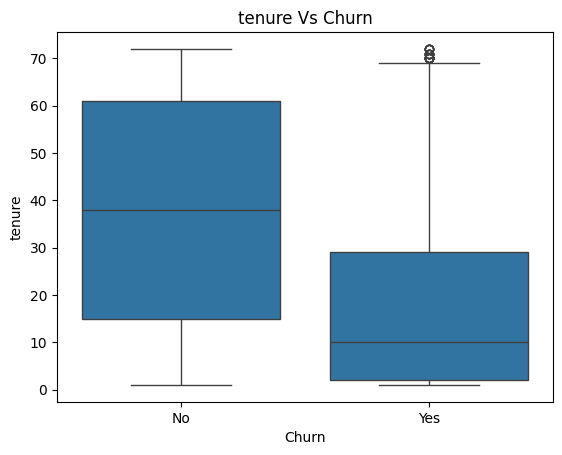

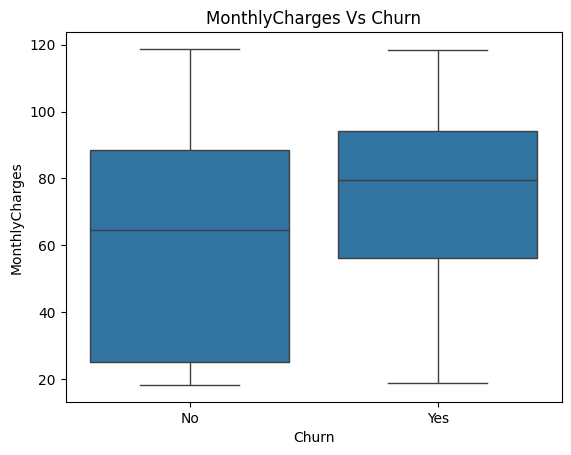

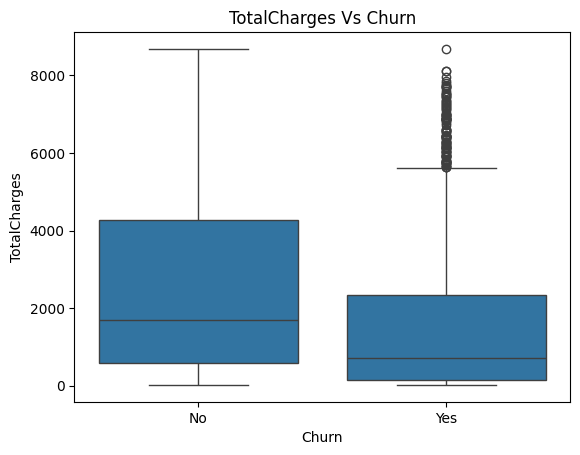

In [170]:
#bivariate analysis, Churn Vs numerical Features
for col in num_cols:
  sns.boxplot(data=df, x='Churn', y=col)
  plt.title(f"{col} Vs Churn")
  plt.show()

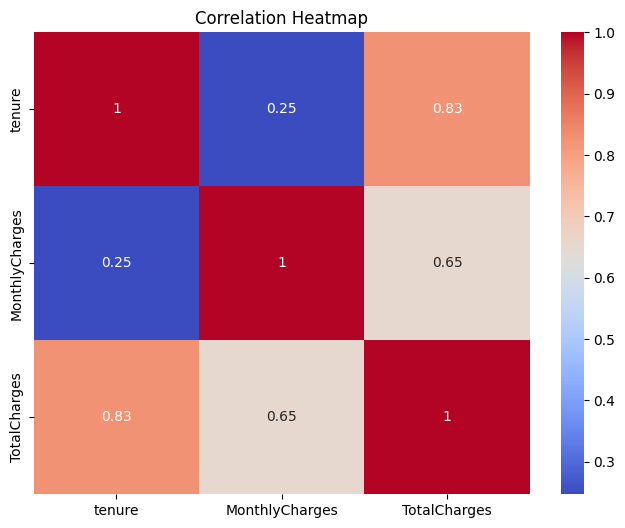

In [171]:
#correlation matrix for numerical features
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True,cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

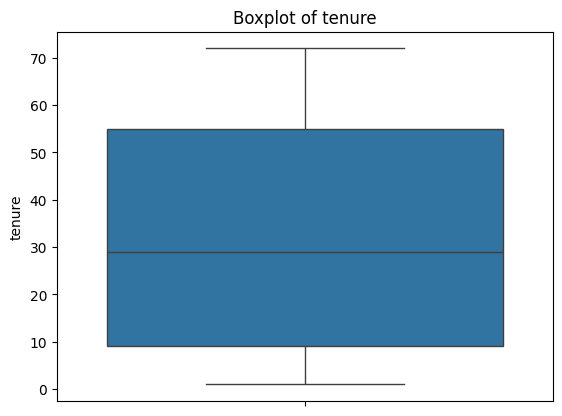

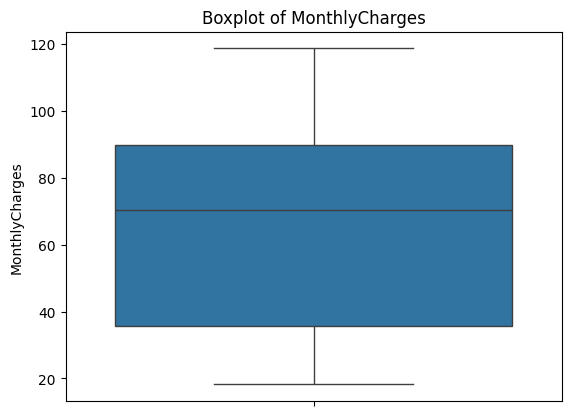

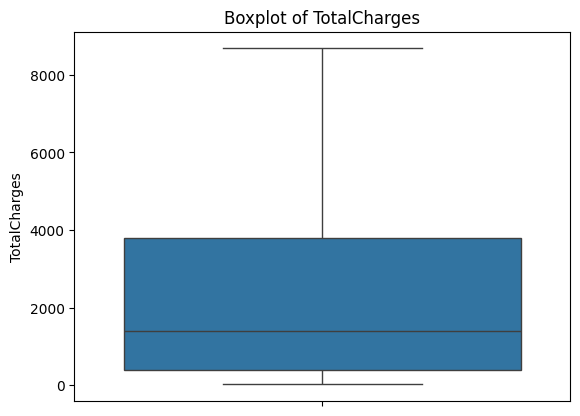

In [172]:
#outlier detection
for col in num_cols:
  sns.boxplot(data=df, y=col)
  plt.title(f"Boxplot of {col}")
  plt.show()

In [173]:
#Preprocessing data
# Replace service-related "No phone/internet service" values with "No" for cleaner categorical data
cols_to_clean = ['MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_to_clean:
  df[col]=df[col].replace({"No phone service":"No","No internet service":"No"})


In [174]:
#drop customer ID because it is irrelevant
df.drop("customerID",axis=1,inplace=True)

In [175]:
#dividing the features from the target
x = df.drop("Churn",axis = 1)
y = df["Churn"]

#seperating numerical and categorical columns
categorical_cols = x.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = x.select_dtypes(include=["int64","float64"]).columns.tolist()

In [176]:
#creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop ='first'), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

In [177]:
#split data
x_processed = preprocessor.fit_transform(x)
y_encoded = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test, = train_test_split(
    x_processed,y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [178]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print("Shape of X_train:", X_train.shape)
print("Class distribution:", np.bincount(y_train))


After SMOTE:
Shape of X_train: (8260, 23)
Class distribution: [4130 4130]


Churn after handling class imbalance: Counter({np.int64(0): 4130, np.int64(1): 4130})


/tmp/ipython-input-3444002926.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette='viridis')


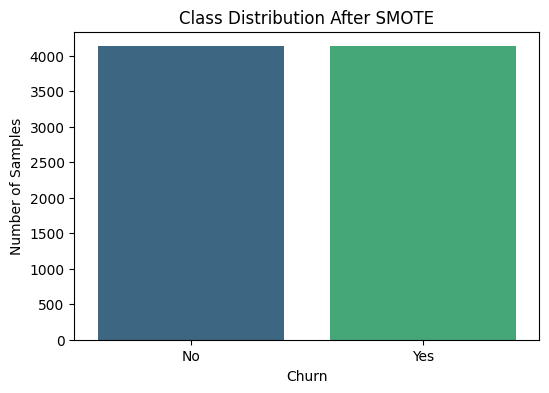

In [179]:
# Count after SMOTE
churn_counts = Counter(y_train)
print("Churn after handling class imbalance:", churn_counts)

# Prepare data for plotting
classes = ['No', 'Yes']
counts = [churn_counts[0], churn_counts[1]]

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=classes, y=counts, palette='viridis')
plt.title("Class Distribution After SMOTE")
plt.ylabel("Number of Samples")
plt.xlabel("Churn")
plt.show()


In [180]:
print("Encoded and scaled dataset:")
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = list(cat_features) + numeric_cols
X_train_df = pd.DataFrame(X_train, columns=all_columns)
X_train_df.info()


Encoded and scaled dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender_Male                            8260 non-null   float64
 1   Partner_Yes                            8260 non-null   float64
 2   Dependents_Yes                         8260 non-null   float64
 3   PhoneService_Yes                       8260 non-null   float64
 4   MultipleLines_Yes                      8260 non-null   float64
 5   InternetService_Fiber optic            8260 non-null   float64
 6   InternetService_No                     8260 non-null   float64
 7   OnlineSecurity_Yes                     8260 non-null   float64
 8   OnlineBackup_Yes                       8260 non-null   float64
 9   DeviceProtection_Yes                   8260 non-null   float64
 10  TechSupport_Yes                        8260 

In [181]:
#Tuned decision Tree
dt_params = {
    'criterion':['gini','entropy'],
    'max_depth':[4,6,8,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}

dt = DecisionTreeClassifier(random_state=42)

dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='f1', n_jobs=-1)
dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_
best_dt



DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       random_state=42)

Decision Tree Results:
Accuracy: 0.7633262260127932
Precision: 0.5448577680525164
Recall: 0.6657754010695187
F1 Score: 0.5992779783393501

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1033
           1       0.54      0.67      0.60       374

    accuracy                           0.76      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.76      0.77      1407



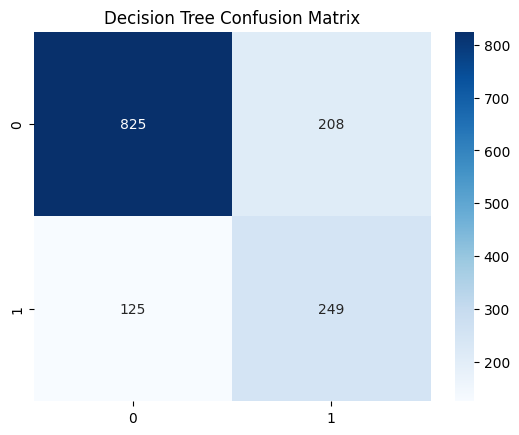

In [182]:
y_pred_dt = best_dt.predict(X_test)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [183]:
# Install Keras Tuner for hyperparameter optimisation
!pip install keras-tuner --upgrade


In [184]:
import keras_tuner as kt

In [185]:
# Define a function that builds a model with tunable hyperparameters
def build_model(hp):
    model = keras.Sequential()

    hp_units_1 = hp.Int('units_1', min_value=32, max_value=128, step=32)
    model.add(layers.Dense(units=hp_units_1, activation='relu', input_shape=(X_train.shape[1],)))

    hp_dropout_1 = hp.Choice('dropout_1', values=[0.0, 0.2, 0.3])
    if hp_dropout_1 > 0:
        model.add(layers.Dropout(hp_dropout_1))

    hp_units_2 = hp.Int('units_2', min_value=16, max_value=64, step=16)
    model.add(layers.Dense(units=hp_units_2, activation='relu'))

    hp_dropout_2 = hp.Choice('dropout_2', values=[0.0, 0.2, 0.3])
    if hp_dropout_2 > 0:
        model.add(layers.Dropout(hp_dropout_2))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Learning rate tuning
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [186]:
# Initialize Random Search Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,   # number of models to try
    executions_per_trial=1,
    directory='my_dir',
    project_name='telco_churn_nn_tuning'
)


Reloading Tuner from my_dir/telco_churn_nn_tuning/tuner0.json


In [187]:
# Perform hyperparameter tuning
tuner.search(
    X_train, y_train,
    epochs=20,
    validation_split=0.2,
    verbose=1
)

In [188]:
# Retrieve the best hyperparameters found
best_hps = tuner.get_best_hyperparameters(1)[0]
best_hps

In [189]:
# Build the best model using the selected hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,705 (18.38 KB)

 Trainable params: 4,705 (18.38 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
# Train the model with best hyperparameters
history = best_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7407 - loss: 0.5235 - val_accuracy: 0.7621 - val_loss: 0.5874
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7731 - loss: 0.4722 - val_accuracy: 0.7294 - val_loss: 0.4917
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7806 - loss: 0.4722 - val_accuracy: 0.7567 - val_loss: 0.5459
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7736 - loss: 0.4768 - val_accuracy: 0.7185 - val_loss: 0.6763
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7768 - loss: 0.4627 - val_accuracy: 0.7972 - val_loss: 0.4782
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7906 - loss: 0.4623 - val_accuracy: 0.8154 - val_loss: 0.4107
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7708 - loss: 0.4621 - val_accuracy: 0.7542 - val_loss: 0.4864
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7794 - loss: 0.4614 - val_accuracy: 

In [191]:
# Evaluate the tuned model on test data
loss, accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7605 - loss: 0.5020
Test Accuracy: 0.7661691308021545


In [192]:
# Predict probabilities and convert to class labels
y_pred_prob = best_model.predict(X_test)
y_pred_tf = (y_pred_prob > 0.5).astype(int)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [193]:
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred_tf))
print("Precision:", precision_score(y_test, y_pred_tf))
print("Recall:", recall_score(y_test, y_pred_tf))
print("F1 Score:", f1_score(y_test, y_pred_tf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tf))

Accuracy: 0.7661691542288557
Precision: 0.5507900677200903
Recall: 0.6524064171122995
F1 Score: 0.5973072215422277

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1033
           1       0.55      0.65      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



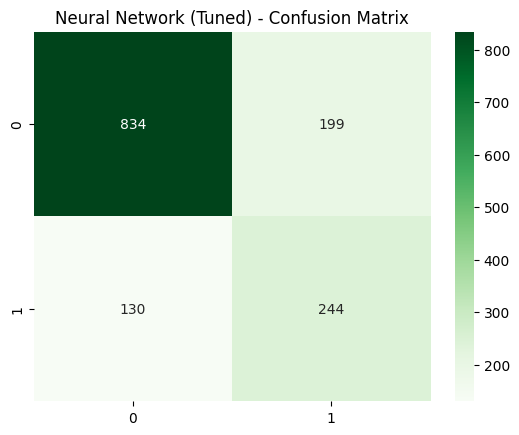

In [194]:
# Plot confusion matrix for tuned neural network
cm_tf = confusion_matrix(y_test, y_pred_tf)
sns.heatmap(cm_tf, annot=True, fmt='d', cmap='Greens')
plt.title("Neural Network (Tuned) - Confusion Matrix")
plt.show()



Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
0           Decision Tree  0.763326   0.544858  0.665775  0.599278
1  Neural Network (Tuned)  0.766169   0.550790  0.652406  0.597307


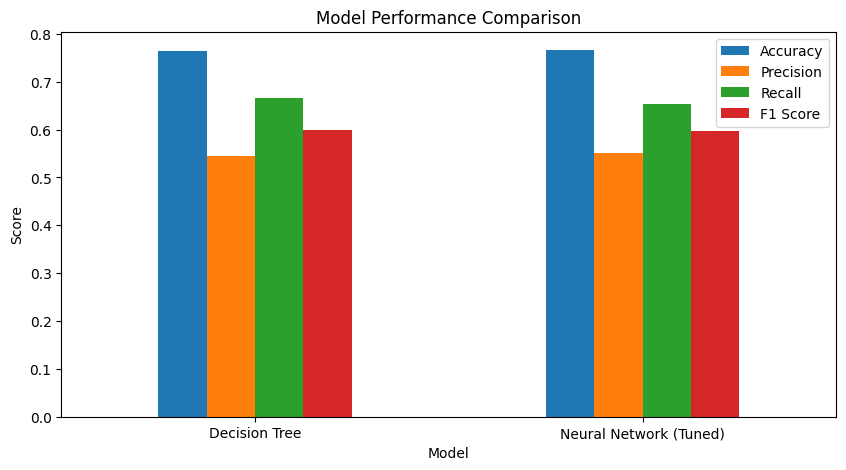

In [195]:
# MODEL COMPARISON
comparison = {
    "Model": ["Decision Tree", "Neural Network (Tuned)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_tf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_tf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_tf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_tf)
    ]
}

comparison_df = pd.DataFrame(comparison)
print("\nModel Comparison:")
print(comparison_df)

#chart for visual comparison
comparison_df.set_index("Model").plot(kind='bar', figsize=(10,5), ylabel="Score", title="Model Performance Comparison")
plt.xticks(rotation=0)
plt.show()


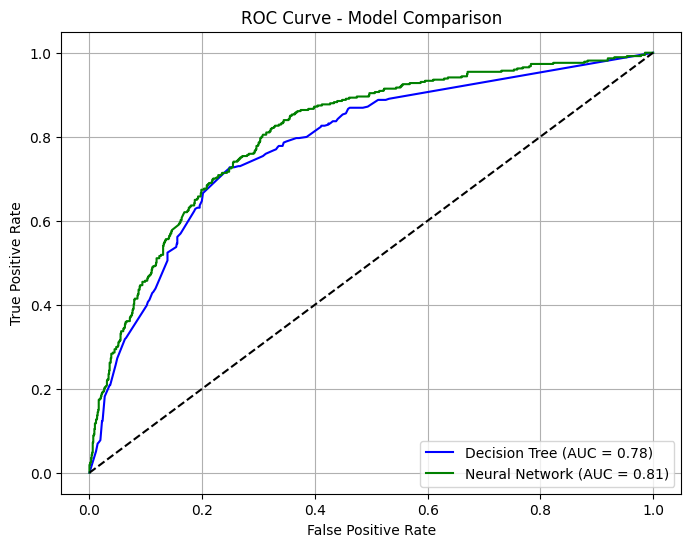

In [196]:
# Get predicted probabilities for Decision Tree
y_pred_dt_prob = best_dt.predict_proba(X_test)[:, 1]

# Get predicted probabilities for Neural Network
y_pred_nn_prob = y_pred_prob[:, 0]

# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)
auc_dt = roc_auc_score(y_test, y_pred_dt_prob)

# Compute ROC curve and AUC for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_prob)
auc_nn = roc_auc_score(y_test, y_pred_nn_prob)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", color='blue')
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.2f})", color='green')
plt.plot([0,1], [0,1], 'k--')  # diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
